In [3]:
%pip install numpy
%pip install matplotlib
%pip install deap
%pip install geopy
%pip install pyproj

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip in

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
from geopy.distance import geodesic
from pyproj import Proj, transform

cities = {
    "Seattle": (47.608013, -122.335167),
    "Boise": (43.616616, -116.200886),
    "Everett": (47.967306, -122.201399),
    "Pendleton": (45.672075, -118.788597),
    "Biggs": (45.669846, -120.832841),
    "Portland": (45.520247, -122.674194),
    "Twin Falls": (42.570446, -114.460255),
    "Bend": (44.058173, -121.315310),
    "Spokane": (47.657193, -117.423510),
    "Grant Pass": (42.441561, -123.339336),
    "Burns": (43.586126, -119.054413),
    "Eugene": (44.050505, -123.095051),
    "Lakeview": (42.188772, -120.345792),
    "Missoula": (46.870105, -113.995267)
}

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(len(cities)), len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [3]:
def calculate_distance(individual):
    total_distance = 0
    for i in range(len(individual) - 1):
        city1 = cities[list(cities.keys())[individual[i]]]
        city2 = cities[list(cities.keys())[individual[i + 1]]]
        distance = geodesic(city1, city2).kilometers
        total_distance += distance
    return total_distance,

toolbox.register("evaluate", calculate_distance)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0 / len(cities))
toolbox.register("select", tools.selTournament, tournsize=2)

In [7]:
random.seed(42)

# Create the initial population
population = toolbox.population(n=300)

best_individuals_per_generation = []
average_fitness_per_generation = []
best_fitness_per_generation = []

initial_fitness = [toolbox.evaluate(ind) for ind in population]

best_initial_idx = np.argmin(initial_fitness)
best_initial_individual = population[best_initial_idx]

print("GENERATION 0")
print("******************")
print("INITIAL RANDOM PATH AND DISTANCE:")
print(" ==> ".join([list(cities.keys())[idx] for idx in best_initial_individual]), end=" ==> ")
print(list(cities.keys())[best_initial_individual[0]])
print(f"Fitness value: {initial_fitness[best_initial_idx]}")
print("******************")

hof = tools.HallOfFame(5)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

# Iterate through generations
for generation in range(200):
    print(f"**GENERATION**: {generation}")
    print("******************")

    fitness_values = [toolbox.evaluate(ind) for ind in population]

    best_idx = np.argmin(fitness_values)
    best_individual = population[best_idx]

    print("Best Path and Distance:")
    print(" ==> ".join([list(cities.keys())[idx] for idx in best_individual]), end=" ==> ")
    print(list(cities.keys())[best_individual[0]])
    print(f"Fitness value: {fitness_values[best_idx]}")
    print("******************")

    pop, _ = algorithms.eaMuPlusLambda(
        population,
        toolbox,
        mu=300,
        lambda_=300,
        cxpb=0.90,
        mutpb=0.1,
        ngen=1,
        stats=None,
        halloffame=hof,
        verbose=False,
    )

    population = pop  # Update the population for the next generation

    fitness_values = [toolbox.evaluate(ind)[0] for ind in population]

    # Record the average and best fitness
    average_fitness = np.mean(fitness_values)
    best_fitness = np.min(fitness_values)
    average_fitness_per_generation.append(average_fitness)
    best_fitness_per_generation.append(best_fitness)

    # Store the best individual of this generation
    best_idx = np.argmin(fitness_values)
    best_individuals_per_generation.append(population[best_idx])

# After the evolution process is complete, check if the Hall of Fame is not empty
if hof.items:
    best_individual_hof = hof[0]
    best_fitness_hof = toolbox.evaluate(best_individual_hof)

    print("******************")
    print("FINAL PATH AND DISTANCE:")
    print(" ==> ".join([list(cities.keys())[idx] for idx in best_individual_hof]), end=" ==> ")
    print(list(cities.keys())[best_individual_hof[0]])
    print(f"Fitness value: {best_fitness_hof}")
    print("******************")
else:
    print("The Hall of Fame is empty. No best individual found.")

# Plotting function
def plot_path(individual):
    path = [cities[list(cities.keys())[idx]] for idx in individual]
    path.append(path[0])  # Complete the loop by returning to the first city
    plt.plot(*zip(*path), marker='o')

GENERATION 0
******************
INITIAL RANDOM PATH AND DISTANCE:
Seattle ==> Portland ==> Missoula ==> Twin Falls ==> Boise ==> Biggs ==> Bend ==> Grant Pass ==> Eugene ==> Lakeview ==> Burns ==> Spokane ==> Pendleton ==> Everett ==> Seattle
Fitness value: (4192.005603479338,)
******************
**GENERATION**: 0
******************
Best Path and Distance:
Seattle ==> Portland ==> Missoula ==> Twin Falls ==> Boise ==> Biggs ==> Bend ==> Grant Pass ==> Eugene ==> Lakeview ==> Burns ==> Spokane ==> Pendleton ==> Everett ==> Seattle
Fitness value: (4192.005603479338,)
******************
**GENERATION**: 1
******************
Best Path and Distance:
Spokane ==> Missoula ==> Burns ==> Grant Pass ==> Lakeview ==> Twin Falls ==> Boise ==> Biggs ==> Bend ==> Portland ==> Everett ==> Seattle ==> Pendleton ==> Eugene ==> Spokane
Fitness value: (3960.3281462861805,)
******************
**GENERATION**: 2
******************
Best Path and Distance:
Missoula ==> Spokane ==> Burns ==> Grant Pass ==> Lake

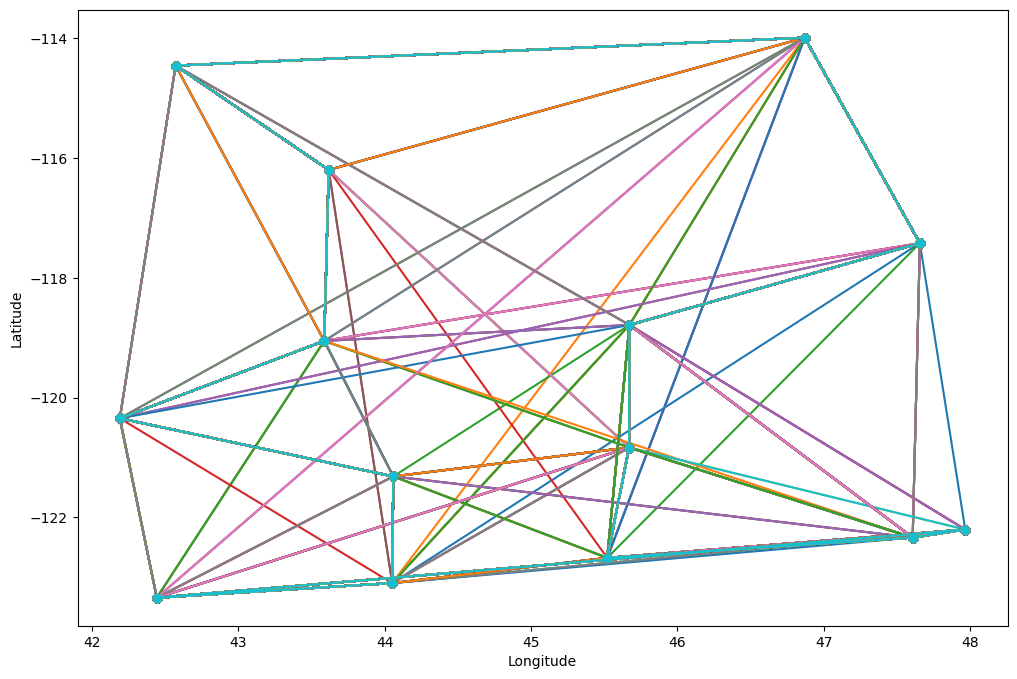

In [8]:
# Plotting all paths
plt.figure(figsize=(12, 8))
for individual in best_individuals_per_generation:
    plot_path(individual)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

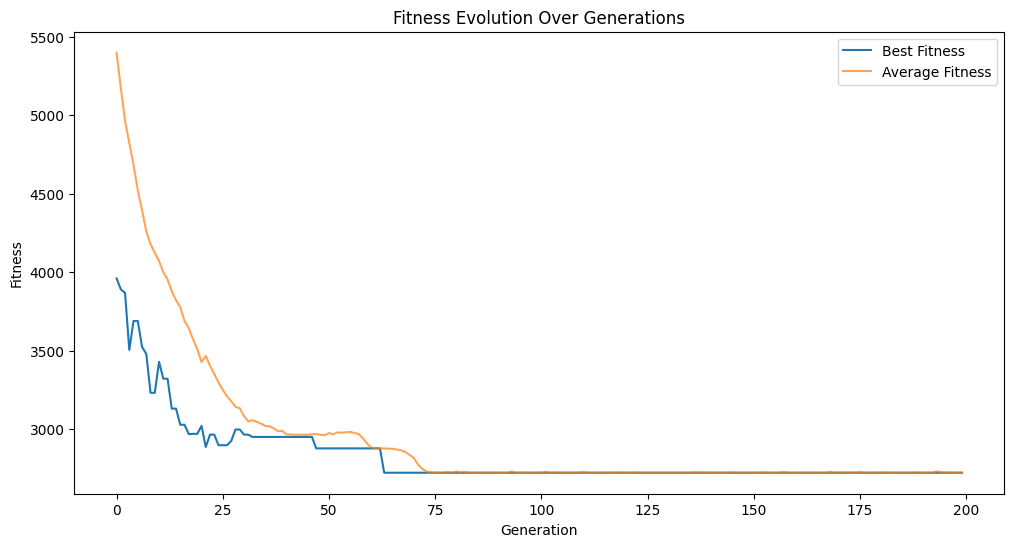

In [9]:
# Plotting fitness evolution
plt.figure(figsize=(12, 6))
plt.plot(best_fitness_per_generation, label='Best Fitness')
plt.plot(average_fitness_per_generation, label='Average Fitness', alpha=0.7)
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Evolution Over Generations')
plt.legend()
plt.show()